|  Column name  |  Description  |
| ----- | ------- |
| Num_posts        | Number of total posts that the user has ever posted   |
| Num_following    | Number of following                                   |
| Num_followers    | Number of followers                                   |
| Biography_length | Length (number of characters) of the user's biography |
| Picture_availability | Value 0 if the user has no profile picture, or 1 if has |
| Link_availability| Value 0 if the user has no external URL, or 1 if has |
| Average_caption_length | The average number of character of captions in media |
| Caption_zero     | Percentage (0.0 to 1.0) of captions that has almost zero (<=3) length |
| Non_image_percentage | Percentage (0.0 to 1.0) of non-image media. There are three types of media on an Instagram post, i.e. image, video, carousel
| Engagement_rate_like | Engagement rate (ER) is commonly defined as (num likes) divide by (num media) divide by (num followers)
| Engagement_rate_comment | Similar to ER like, but it is for comments |
| Location_tag_percentage | Percentage (0.0 to 1.0) of posts tagged with location |
| Average_hashtag_count   | Average number of hashtags used in a post |
| Promotional_keywords | Average use of promotional keywords in hashtag, i.e. regrann, contest, repost, giveaway, mention, share, give away, quiz |
| Followers_keywords | Average use of followers hunter keywords in hashtag, i.e. follow, like, folback, follback, f4f|
| Cosine_similarity  | Average cosine similarity of between all pair of two posts a user has |
| Post_interval      | Average interval between posts (in hours) |
| real_fake          | r (real/authentic user), f (fake user/bought followers) |

# Q1: Import labraries

In [1]:
# write your code here ^_^
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Q2: Read instagram_users.csv file

In [2]:
# write your code here ^_^
df = pd.read_csv('instagram_users.csv')
df

,Num_posts,Num_following,Num_followers,Biography_length,Picture_availability,Link_availability,Average_caption_length,Caption_zero,Non_image_percentage,Engagement_rate_like,Engagement_rate_comment,Location_tag_percentage,Average_hashtag_count,Promotional_keywords,Followers_keywords,Cosine_similarity,Post_interval,real_fake
0,44,48,325,33,1,0,12,0.000000,0.000,0.000000,0.00,0.000,0.000,0.0,0.000,0.111111,0.094985,fake
1,10,66,321,150,1,0,213,0.000000,1.000,14.390000,1.97,0.000,1.500,0.0,0.000,0.206826,230.412857,fake
2,33,970,308,101,1,1,436,0.000000,1.000,10.100000,0.30,0.000,2.500,0.0,0.056,0.572174,43.569939,fake
3,70,86,360,14,1,0,0,1.000000,0.000,0.780000,0.06,0.000,0.000,0.0,0.000,1.000000,5.859799,fake
4,3,21,285,73,1,0,93,0.000000,0.000,14.290000,0.00,0.667,0.000,0.0,0.000,0.300494,0.126019,fake
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64239,13,145,642,0,1,0,7,0.461538,0.000,14.270000,0.58,0.000,0.077,0.0,0.000,0.192308,1745.291260,real
64240,652,3000,1300,146,1,1,384,0.000000,0.389,8.520000,0.13,0.000,1.611,0.0,0.000,0.169917,54.629120,real
64241,1500,3700,3200,147,1,1,129,0.000000,0.111,9.390000,0.31,0.722,0.000,0.0,0.056,0.058908,129.802048,real
64242,329,1500,1800,218,1,1,290,0.055556,0.000,6.350000,0.26,0.222,0.500,0.0,0.000,0.103174,53.402840,real


In [3]:
data = df
data['real_fake'] = df['real_fake'].replace(to_replace={'real','fake'},value={1,0})
data.head(10)


,Num_posts,Num_following,Num_followers,Biography_length,Picture_availability,Link_availability,Average_caption_length,Caption_zero,Non_image_percentage,Engagement_rate_like,Engagement_rate_comment,Location_tag_percentage,Average_hashtag_count,Promotional_keywords,Followers_keywords,Cosine_similarity,Post_interval,real_fake
0,44,48,325,33,1,0,12,0.000000,0.000,0.00,0.00,0.000,0.000,0.000,0.000,0.111111,0.094985,0
1,10,66,321,150,1,0,213,0.000000,1.000,14.39,1.97,0.000,1.500,0.000,0.000,0.206826,230.412857,0
2,33,970,308,101,1,1,436,0.000000,1.000,10.10,0.30,0.000,2.500,0.000,0.056,0.572174,43.569939,0
3,70,86,360,14,1,0,0,1.000000,0.000,0.78,0.06,0.000,0.000,0.000,0.000,1.000000,5.859799,0
4,3,21,285,73,1,0,93,0.000000,0.000,14.29,0.00,0.667,0.000,0.000,0.000,0.300494,0.126019,0
5,8,114,295,0,1,0,789,0.000000,0.500,3.84,0.44,0.000,0.125,1.250,0.125,0.194221,1120.515991,0
6,0,180,1300,0,1,0,0,0.000000,0.000,0.00,0.00,0.000,0.000,0.000,0.000,1.000000,0.000000,0
7,28,423,978,0,1,0,570,0.111111,0.000,1.23,0.14,0.000,0.278,0.167,0.056,0.098155,45.840031,0
8,416,23700,1000,60,1,0,919,0.000000,0.833,0.99,0.03,0.667,0.389,0.000,0.000,0.173341,16.401667,0
9,12,61,218,0,1,0,863,0.000000,0.000,10.93,1.37,0.000,0.000,0.000,0.000,0.163697,51.961319,0


# Q3: Split tha dataset into training and testing

In [4]:
# write your code here ^_^
x = data.drop('real_fake',axis=1)
y = data['real_fake']

In [5]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.3,random_state=23)

# Q4: Build three machine models 

## Q4.1: The first machine model
- Print the model's name.
- Print the model's accuracy.
- Print the model's confusion matrix.

In [17]:
# write your code here ^_^
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [12]:
DT = DecisionTreeClassifier()

In [14]:
DT.fit(X_train,y_train)

DecisionTreeClassifier()

In [15]:
prediction= DT.predict(X_test)

In [20]:
print("Accuracy:",metrics.accuracy_score(y_test, prediction))
#print("confusion matrix:",metrics.confusion_matrix(y_test,prediction))

Accuracy: 0.8503164885337761


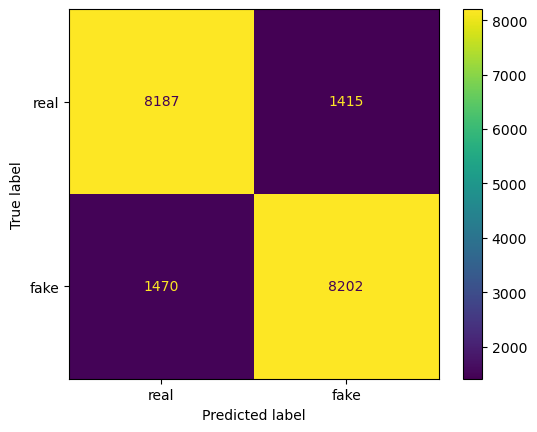

In [22]:
confusion_matrix = metrics.confusion_matrix(y_test,prediction)
display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['real', 'fake'])
display.plot()
plt.show()

## Q4.2: The second machine model
- Print the model's name.
- Print the model's accuracy.
- Print the model's confusion matrix.

In [24]:
# write your code here ^_^
from sklearn.ensemble import RandomForestClassifier  

In [25]:
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier.fit(X_train, y_train)  

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [26]:
classifier.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [27]:
pred2 = classifier.predict(X_test)

In [28]:
print("Accuracy:",metrics.accuracy_score(y_test, pred2))

Accuracy: 0.882795475770468


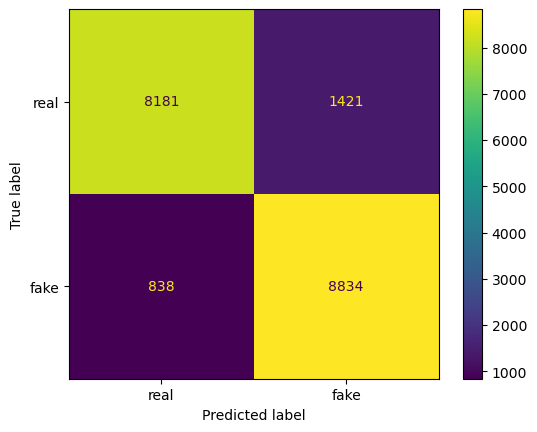

In [30]:
confusion_matrix2 = metrics.confusion_matrix(y_test,pred2)
display2 = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix2, display_labels = ['real', 'fake'])
display2.plot()
plt.show()

## Q4.3: The third machine model
- Print the model's name.
- Print the model's accuracy.
- Print the model's confusion matrix.

In [ ]:
# write your code here ^_^